In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import shap

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('credit_score.csv')
df.head(3)

/var/folders/9h/41tfgtlx7vg3_zr70vr31q8w0000gn/T/ipykernel_24962/1842776913.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
nan_count_method_1 = df.isna().sum()
nan_count_method_1

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
mode_by_A = df.groupby('Customer_ID')['Name'].apply(lambda x: len(x.mode()))
mode_by_A.max()

1

Name и Customer_ID совпадают и уникальны. (Будем удалять.)
Затем заполняем NaN в столбце Name, часто встречающимся именем с данным ID:

In [7]:
mode_by_A = df.groupby('Customer_ID')['Name'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Name'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Name']) else row['Name'], axis=1)

In [8]:
nan_count_method_1 = df.isna().sum()
nan_count_method_1

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Months

Заменем название месяцев на числа

In [9]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [10]:
df['Month'] = df['Month'].replace(month_to_number)

In [11]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


Age

In [12]:
df['Age'].head(10)

0      23
1      23
2    -500
3      23
4      23
5      23
6      23
7      23
8     28_
9      28
Name: Age, dtype: object

In [13]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype(float)

In [14]:
nan_count_method_1 = df.isna().sum()
nan_count_method_1['Age']

4939

Заменили тип столбеца 'Age' object на тип float. Заметили что появились пропуски. Теперь сделаем предположения что возраст от 0 до 110 лет и преобразуем столбец 'Age'.

In [15]:
df['Age'] = df['Age'].apply(lambda x: x if x >= 0  and x < 110 else np.nan)

In [16]:
df['Age'].min(), df['Age'].max()

(14.0, 109.0)

In [17]:
mode_by_A = df.groupby('Customer_ID')['Age'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Age'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Age']) else row['Age'], axis=1)

Occupation

In [18]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [19]:
df['Occupation'] = df['Occupation'].replace('_______', pd.NA)


In [20]:
mode_by_A = df.groupby('Customer_ID')['Occupation'].apply(lambda x: len(x.mode()))

In [21]:
mode_by_A.max()

1

In [22]:
mode_by_A = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Occupation'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Occupation']) else row['Occupation'], axis=1)

In [23]:
# Применение метода get_dummies для создания OneHotEncoder
one_hot_encoded = pd.get_dummies(df['Occupation'])

# Объединение исходного датафрейма и OneHotEncoder
df = pd.concat([df, one_hot_encoded], axis=1)


In [24]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Удалим уникальные столдцы

In [25]:
df.drop(['SSN'], axis=1, inplace=True)

In [26]:
df.drop(['Occupation'], axis=1, inplace=True)

In [27]:
df.drop(['ID'], axis=1, inplace=True)

In [28]:
df.head(3)

,Customer_ID,Month,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
0,CUS_0xd40,1,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,CUS_0xd40,2,Aaron Maashoh,23.0,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,CUS_0xd40,3,Aaron Maashoh,23.0,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Annual_Income

In [29]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').astype(float)
mode_by_A = df.groupby('Customer_ID')['Annual_Income'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
#df['Annual_Income'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Annual_Income']) else row['Annual_Income'], axis=1)

In [30]:
mode_by_A.head(3)

Customer_ID
CUS_0x1000     30625.94
CUS_0x1009     52312.68
CUS_0x100b    113781.39
Name: Annual_Income, dtype: float64

In [31]:
mode_by_A = df.groupby('Customer_ID')['Annual_Income'].apply(lambda x: len(x.mode()))

In [32]:
mode_by_A.max()

1

Следовательно Annual_Income у всех Customer_ID уникальный. Затем выполним замену:

In [33]:
df['Annual_Income'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Annual_Income']) else row['Annual_Income'], axis=1)

Повторяем для следующих столбцов ту же обработку

Monthly_Inhand_Salary

In [34]:
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce').astype(float)
mode_by_A = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

In [35]:
mode_by_A.head(5)

Customer_ID
CUS_0x1000    2706.161667
CUS_0x1009    4250.390000
CUS_0x100b    9549.782500
CUS_0x1011    5208.872500
CUS_0x1013    7962.415000
Name: Monthly_Inhand_Salary, dtype: float64

In [36]:
mode_by_A = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: len(x.mode()))

In [37]:
mode_by_A.max()

2

Значения оказались не уникальные, по этому сделаем два столбца

In [38]:
df['Monthly_Inhand_Salary_Change'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: len(x.mode()))
df['Monthly_Inhand_Salary'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Monthly_Inhand_Salary']) else row['Monthly_Inhand_Salary'], axis=1)

KeyError: 'CUS_0xd40'

In [39]:
df.head(3)

,Customer_ID,Month,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
0,CUS_0xd40,1,Aaron Maashoh,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,CUS_0xd40,2,Aaron Maashoh,23.0,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,CUS_0xd40,3,Aaron Maashoh,23.0,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


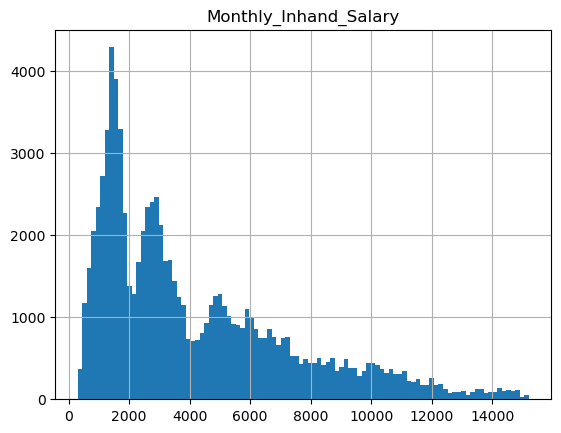

In [40]:
df.hist(column='Monthly_Inhand_Salary',bins = 100);

In [45]:
#df['Monthly_Inhand_Salary'].min()

1.0

In [46]:
#df = df[df['Monthly_Inhand_Salary'] != 1]


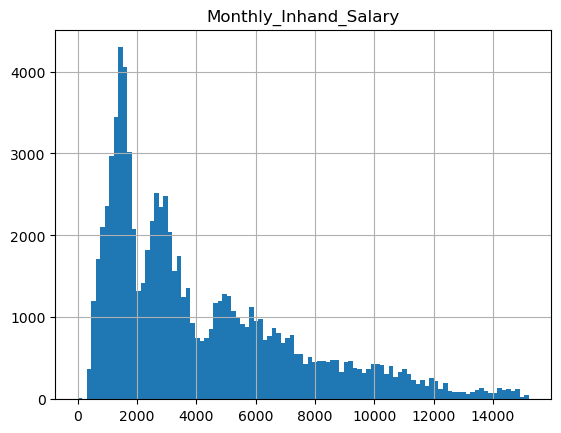

In [47]:
#df.hist(column='Monthly_Inhand_Salary',bins = 100);

Num_Bank_Accounts

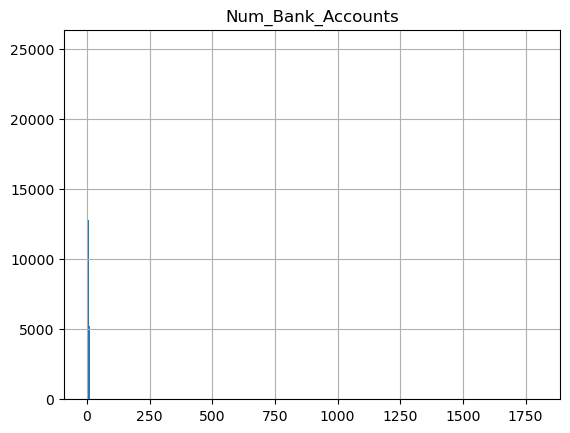

In [41]:
df.hist(column='Num_Bank_Accounts',bins = 1000);

In [44]:
df['Num_Bank_Accounts'].value_counts().head(11)

928     1
243     1
583     1
1695    1
726     1
987     1
1626    1
1470    1
887     1
211     1
697     1
Name: Num_Bank_Accounts, dtype: int64

In [45]:
df['Num_Bank_Accounts'].value_counts().tail(11)

928     1
243     1
583     1
1695    1
726     1
987     1
1626    1
1470    1
887     1
211     1
697     1
Name: Num_Bank_Accounts, dtype: int64

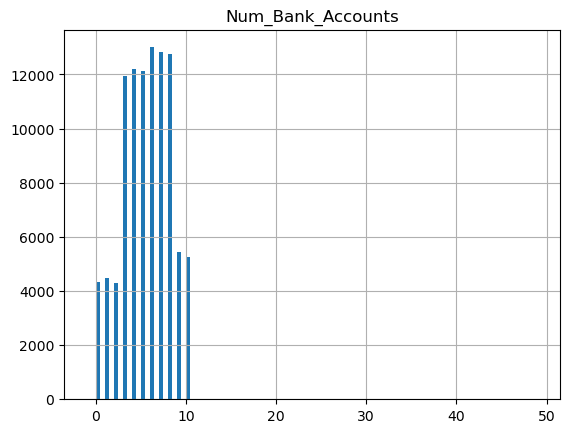

In [46]:
df[df['Num_Bank_Accounts']<50].hist(column='Num_Bank_Accounts',bins = 100);

In [47]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce').astype(float)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0  and x < 12 else np.nan)

In [48]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce').astype(float)

In [49]:
#Num_Bank_Accounts_Change
df['Num_Bank_Accounts_Change'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: len(x.mode()))

In [50]:
df['Num_Bank_Accounts_Change'].max()

2

In [51]:
mode_by_A = df.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_Bank_Accounts'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_Bank_Accounts']) else row['Num_Bank_Accounts'], axis=1)

Num_Credit_Card

array([[<Axes: title={'center': 'Num_Credit_Card'}>]], dtype=object)

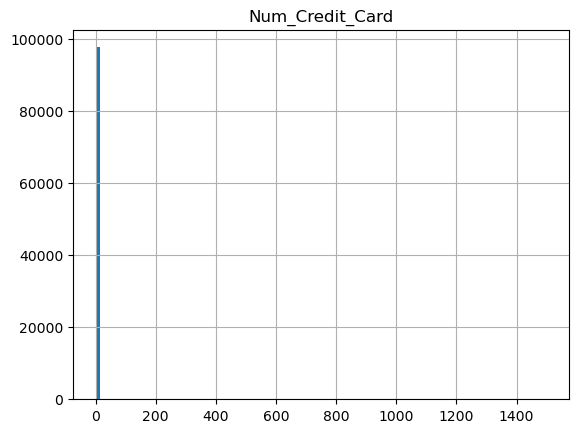

In [56]:
df.hist(column="Num_Credit_Card", bins=100)

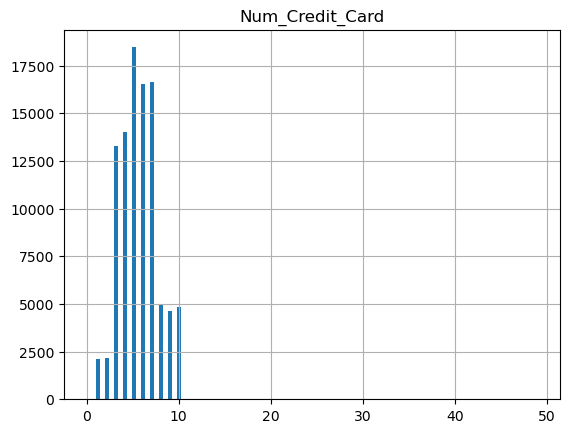

In [57]:
df[df["Num_Credit_Card"]<50].hist(column="Num_Credit_Card", bins=100);

In [58]:
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce').astype(float)
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: x if x >= 0  and x < 11 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_Credit_Card'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_Credit_Card']) else row['Num_Credit_Card'], axis=1)

Interest_Rate

array([[<Axes: title={'center': 'Interest_Rate'}>]], dtype=object)

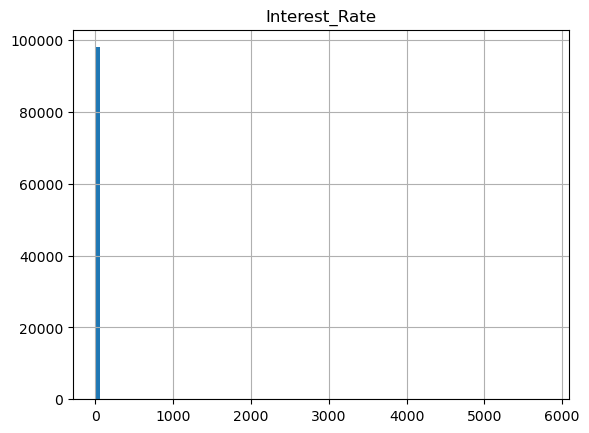

In [60]:
df.hist(column="Interest_Rate", bins=100)

array([[<Axes: title={'center': 'Interest_Rate'}>]], dtype=object)

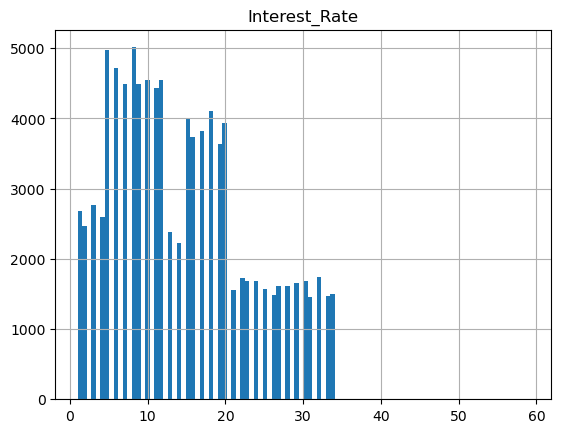

In [68]:
df[df["Interest_Rate"]<60].hist(column="Interest_Rate", bins=100)

In [69]:
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce').astype(float)
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x >= 0  and x < 40 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Interest_Rate'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Interest_Rate']) else row['Interest_Rate'], axis=1)

Num_of_Loan

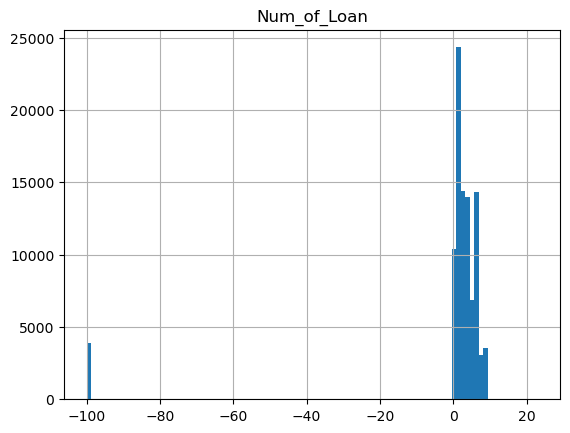

In [71]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype(float)
df[df["Num_of_Loan"]<25].hist(column="Num_of_Loan", bins=100);

In [72]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: x if x >= 0  and x < 15 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_of_Loan'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_of_Loan']) else row['Num_of_Loan'], axis=1)

Type_of_Loan

In [189]:
df['Type_of_Loan'].head(5)

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1    Auto Loan, Credit-Builder Loan, Personal Loan,...
2    Auto Loan, Credit-Builder Loan, Personal Loan,...
3    Auto Loan, Credit-Builder Loan, Personal Loan,...
4    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object

In [191]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [192]:
df.drop(['Type_of_Loan'], axis=1, inplace=True)

Delay_from_due_date

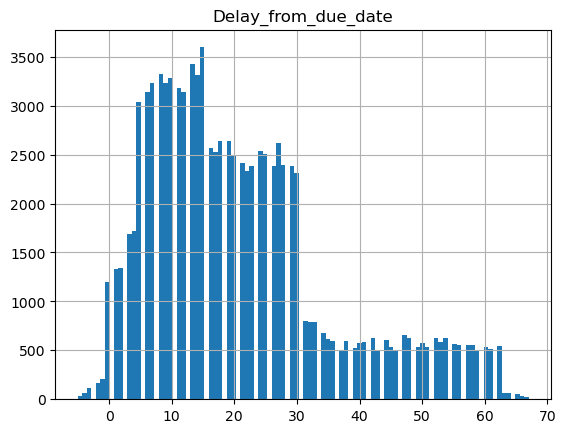

In [77]:
df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce').astype(float)
df[df["Delay_from_due_date"]<70].hist(column="Delay_from_due_date", bins=100);

Num_of_Delayed_Payment

In [79]:
df['Num_of_Delayed_Payment'].head(3)

0      7
1    NaN
2      7
Name: Num_of_Delayed_Payment, dtype: object

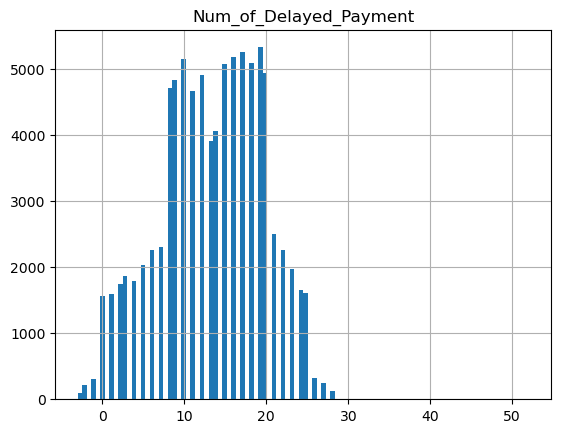

In [81]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype(float)
df[df["Num_of_Delayed_Payment"]<70].hist(column="Num_of_Delayed_Payment", bins=100);

In [82]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: x if x >= 0  and x < 30 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_of_Delayed_Payment'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_of_Delayed_Payment']) else row['Num_of_Delayed_Payment'], axis=1)

Changed_Credit_Limit

In [84]:
df['Changed_Credit_Limit'].head(5)

0    11.27
1    11.27
2        _
3     6.27
4    11.27
Name: Changed_Credit_Limit, dtype: object

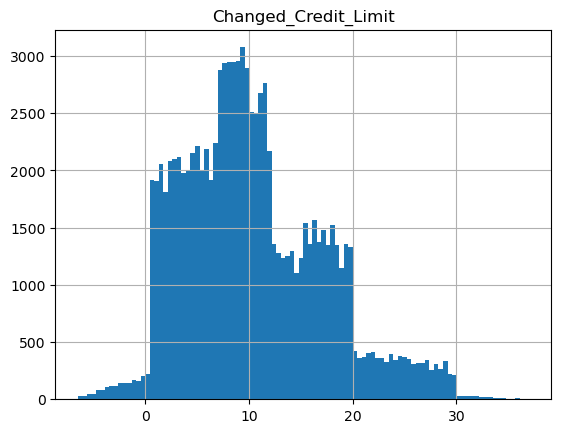

In [85]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype(float)
df[df["Changed_Credit_Limit"]<70].hist(column="Changed_Credit_Limit", bins=100);

In [86]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: x if x >= -10  and x < 40 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Changed_Credit_Limit'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Changed_Credit_Limit']) else row['Changed_Credit_Limit'], axis=1)

Num_Credit_Inquiries

In [88]:
df['Num_Credit_Inquiries'].max()

2597.0

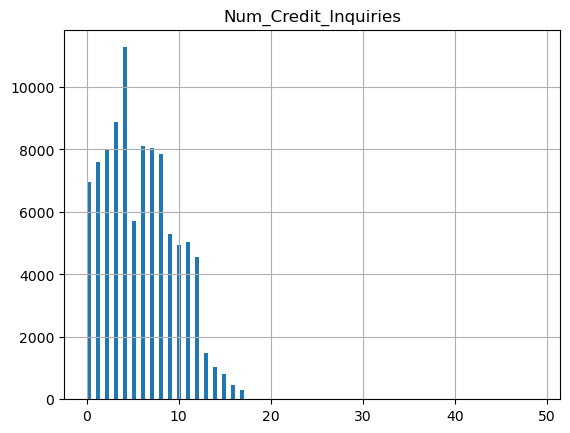

In [89]:
df[df['Num_Credit_Inquiries']<50].hist(column="Num_Credit_Inquiries", bins=100);

In [90]:
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce').astype(float)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: x if x >= 0  and x < 20 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_Credit_Inquiries'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_Credit_Inquiries']) else row['Num_Credit_Inquiries'], axis=1)

Credit_Mix

In [193]:
df['Credit_Mix'].head(5)

0       _
1    Good
2    Good
3    Good
4    Good
Name: Credit_Mix, dtype: object

In [312]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [194]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', pd.NA)

In [196]:
mode_by_A = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: len(x.mode()))
mode_by_A.max()

1

In [197]:
mode_by_A = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Credit_Mix'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Credit_Mix']) else row['Credit_Mix'], axis=1)

In [199]:
# Применение метода get_dummies для создания OneHotEncoder
one_hot_encoded = pd.get_dummies(df['Credit_Mix'])
# Объединение исходного датафрейма и OneHotEncoder
df = pd.concat([df, one_hot_encoded], axis=1)
df.head(3)

,Customer_ID,Month,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Num_Bank_Accounts_Change,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard
0,CUS_0xd40,1,Aaron Maashoh,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,22.0,False,4.0,80.415295,312.494089,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,CUS_0xd40,2,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,False,4.0,118.280222,284.629162,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,CUS_0xd40,3,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,28.609352,22.0,False,4.0,81.699521,331.209863,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [200]:
df.drop(['Credit_Mix'], axis=1, inplace=True)

Outstanding_Debt	

In [ ]:
df['Outstanding_Debt'].head()

In [92]:
df['Outstanding_Debt'].max()

'999.48'

In [95]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').astype(float)

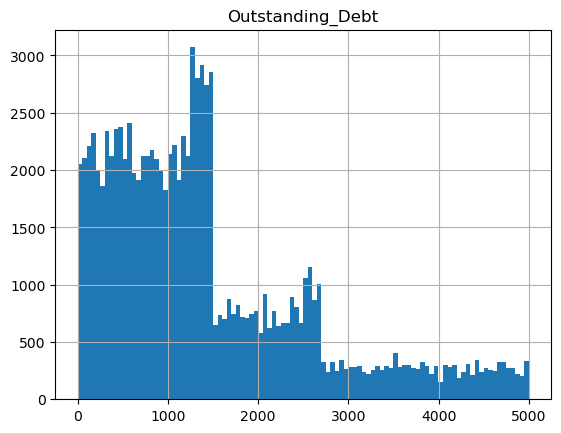

In [99]:
df.hist(column="Outstanding_Debt", bins=100);

Credit_Utilization_Ratio

In [174]:
df['Credit_Utilization_Ratio'].head(5)

0    26.822620
1    31.944960
2    28.609352
3    31.377862
4    24.797347
Name: Credit_Utilization_Ratio, dtype: float64

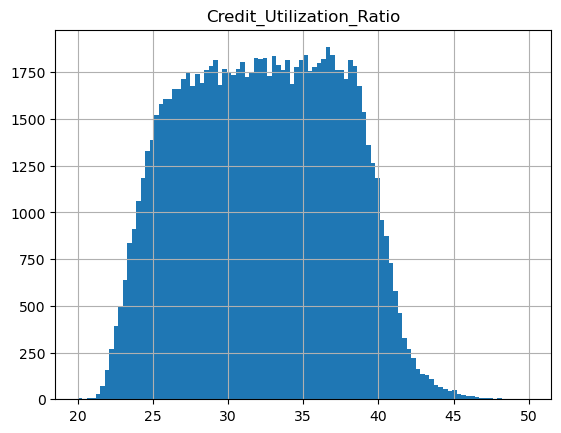

In [100]:
df.hist(column="Credit_Utilization_Ratio", bins=100);

Credit_History_Age

In [101]:
def test_Credit_History_Age(a):
    return a.split(" ")[0]

In [102]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)').astype(np.float32)

In [103]:
df['Credit_History_Age'].head(5)

0    22.0
1     NaN
2    22.0
3    22.0
4    22.0
Name: Credit_History_Age, dtype: float32

Payment_of_Min_Amount

In [107]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [113]:
filter_df = df[df['Payment_of_Min_Amount'] == 'NM']
filter_df['Payment_of_Min_Amount'].head(3)

14    NM
26    NM
33    NM
Name: Payment_of_Min_Amount, dtype: object

Неизвестное значение NM заменим на Null

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', pd.NA)

In [119]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
Name: Payment_of_Min_Amount, dtype: int64

In [128]:
# Изменяем тип данных столбца на bool
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'Yes': True, 'No': False})



In [129]:
df["Payment_of_Min_Amount"].value_counts()

True     52326
False    35667
Name: Payment_of_Min_Amount, dtype: int64

In [130]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('bool')


TypeError: boolean value of NA is ambiguous

In [ ]:
#df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'Yes': True, 'No': False, 'NM': None})

Total_EMI_per_month

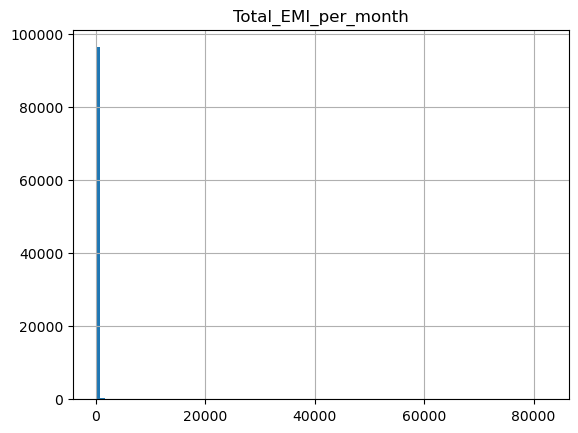

In [120]:
df.hist(column="Total_EMI_per_month", bins=100);

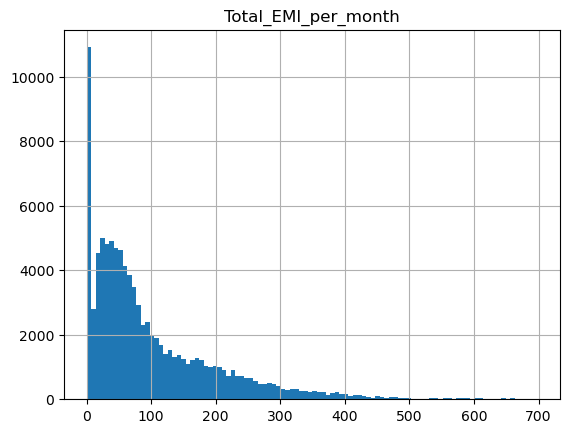

In [142]:
df[df["Total_EMI_per_month"]<700].hist(column="Total_EMI_per_month", bins=100);

In [163]:
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce').astype(float)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].apply(lambda x: x if x >= 0  and x < 700 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Total_EMI_per_month'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Total_EMI_per_month'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Total_EMI_per_month']) else row['Total_EMI_per_month'], axis=1)

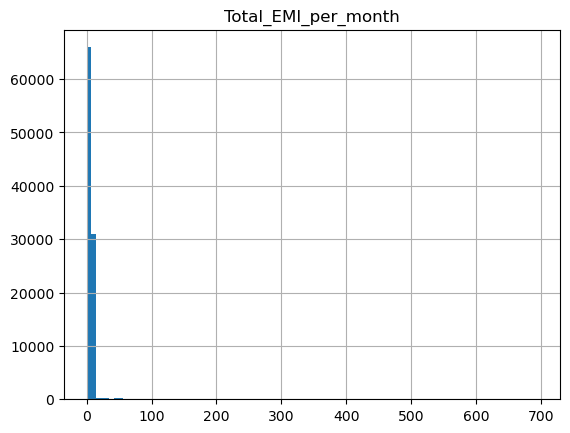

In [164]:
df.hist(column="Total_EMI_per_month", bins=100);

Amount_invested_monthly

In [156]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)

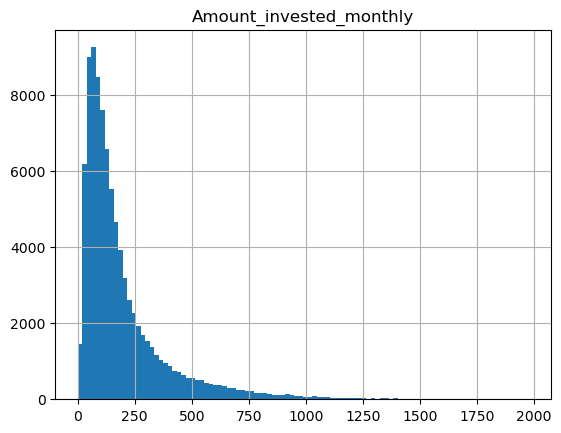

In [157]:
df.hist(column="Amount_invested_monthly", bins=100);

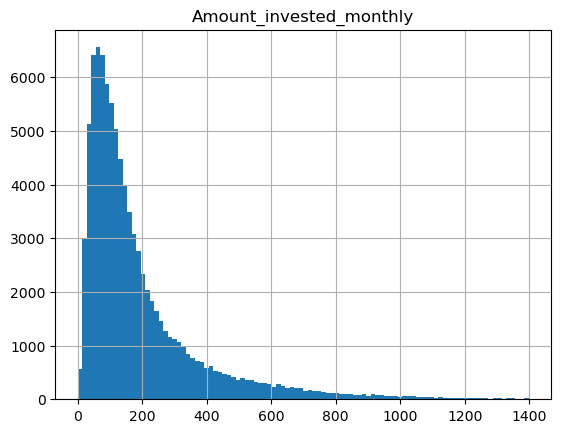

In [160]:
df[df["Amount_invested_monthly"]<1400].hist(column="Amount_invested_monthly", bins=100);

In [161]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: x if x >= 0  and x < 1400 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Amount_invested_monthly'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Amount_invested_monthly']) else row['Amount_invested_monthly'], axis=1)

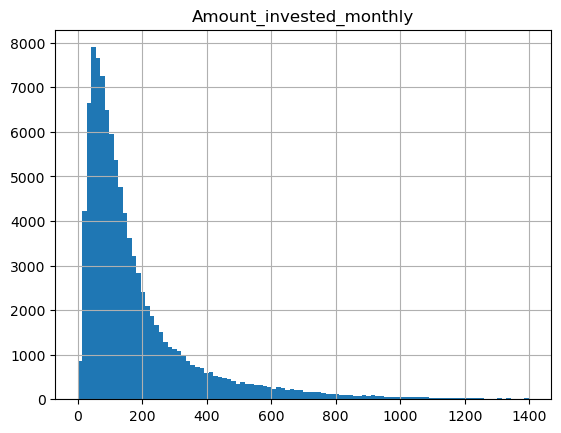

In [165]:
df.hist(column="Amount_invested_monthly", bins=100);

Payment_Behaviour

In [167]:
df['Payment_Behaviour'].head(5)

0     High_spent_Small_value_payments
1      Low_spent_Large_value_payments
2     Low_spent_Medium_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

In [179]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [180]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', pd.NA)

In [183]:
# Применение метода get_dummies для создания OneHotEncoder
one_hot_encoded = pd.get_dummies(df['Payment_Behaviour'])
# Объединение исходного датафрейма и OneHotEncoder
df = pd.concat([df, one_hot_encoded], axis=1)

df.head(3)

,Customer_ID,Month,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Num_Bank_Accounts_Change,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,CUS_0xd40,1,Aaron Maashoh,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,22.0,False,4.0,80.415295,High_spent_Small_value_payments,312.494089,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,CUS_0xd40,2,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,False,4.0,118.280222,Low_spent_Large_value_payments,284.629162,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,CUS_0xd40,3,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,28.609352,22.0,False,4.0,81.699521,Low_spent_Medium_value_payments,331.209863,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [185]:
mode_by_A = df.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: len(x.mode()))
mode_by_A.max()

6

In [186]:
df.drop(['Payment_Behaviour'], axis=1, inplace=True)

Monthly_Balance

In [169]:
df['Monthly_Balance'].head(5)

0    312.49408867943663
1    284.62916249607184
2     331.2098628537912
3    223.45130972736786
4    341.48923103222177
Name: Monthly_Balance, dtype: object

In [171]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype(float)

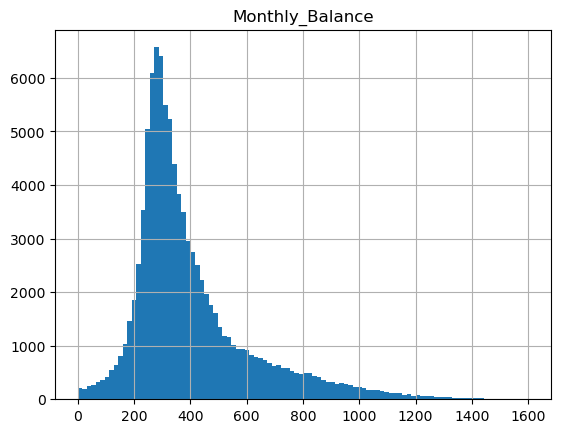

In [172]:
df.hist(column="Monthly_Balance", bins=100);

Credit_Score

In [175]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [176]:
score_to_number = {
    'Poor': 1,
    'Standard': 2,
    'Good': 3
}

In [177]:
df['Credit_Score'] = df['Credit_Score'].replace(score_to_number).astype(int)

In [178]:
df['Credit_Score'].value_counts()

2    53174
1    28998
3    17828
Name: Credit_Score, dtype: int64

Сделали предобработку данных. Готовимся к обучению:

In [201]:
df.head(5)

,Customer_ID,Month,Name,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Num_Bank_Accounts_Change,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard
0,CUS_0xd40,1,Aaron Maashoh,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,22.0,False,4.0,80.415295,312.494089,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,CUS_0xd40,2,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,809.98,31.944960,NaN,False,4.0,118.280222,284.629162,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,CUS_0xd40,3,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,28.609352,22.0,False,4.0,81.699521,331.209863,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,CUS_0xd40,4,Aaron Maashoh,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,809.98,31.377862,22.0,False,4.0,199.458074,223.451310,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,CUS_0xd40,5,Aaron Maashoh,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,809.98,24.797347,22.0,False,4.0,41.420153,341.489231,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0


In [202]:
df.to_csv('credit_score_with_Name-Customer_ID.csv')

In [203]:
df.drop(['Name', 'Customer_ID'],axis=1,inplace=True)

/var/folders/9h/41tfgtlx7vg3_zr70vr31q8w0000gn/T/ipykernel_24962/3738696617.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr().round(3).sort_values('Credit_Score')


<Axes: >

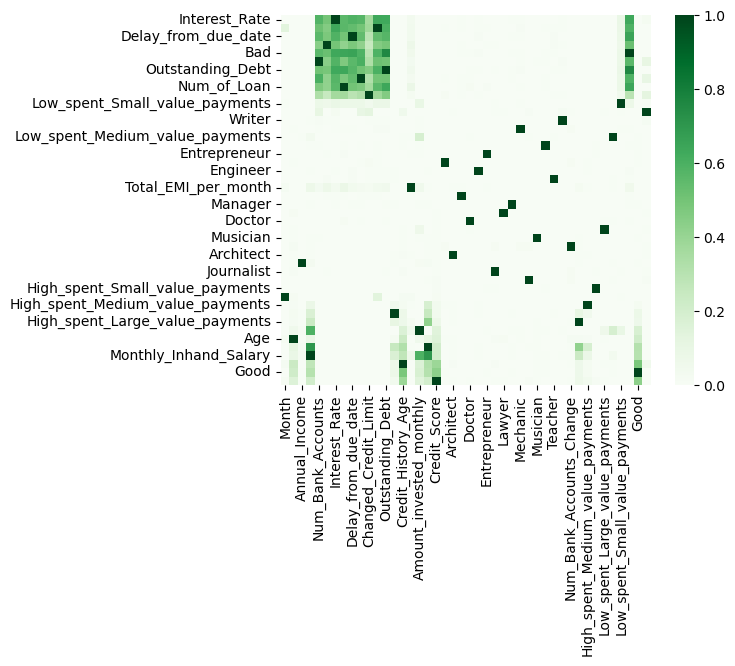

In [204]:
corrs = df.corr().round(3).sort_values('Credit_Score')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

In [209]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
X = df.drop(['Credit_Score'], axis=1, errors = 'ignore')
y = df['Credit_Score'].fillna(0)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
X.head(10)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,Num_Bank_Accounts_Change,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,22.0,False,4.0,80.415295,312.494089,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,2,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,809.98,31.944960,NaN,False,4.0,118.280222,284.629162,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,3,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,28.609352,22.0,False,4.0,81.699521,331.209863,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,4,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,809.98,31.377862,22.0,False,4.0,199.458074,223.451310,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,809.98,24.797347,22.0,False,4.0,41.420153,341.489231,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
5,6,23.0,19114.12,NaN,3.0,4.0,3.0,4.0,8,4.0,9.27,4.0,809.98,27.262259,22.0,False,4.0,62.430172,340.479212,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,809.98,22.537593,22.0,False,4.0,178.344067,244.565317,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,6.0,11.27,4.0,809.98,23.933795,NaN,False,4.0,24.785217,358.124168,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3,4.0,5.42,2.0,605.03,24.464031,26.0,False,4.0,104.291825,470.690627,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,7,1.0,7.42,2.0,605.03,38.550848,26.0,False,4.0,40.391238,484.591214,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0


In [218]:
model = CatBoostClassifier(handle_missing=True,
                           random_state=42,
                           thread_count=-1,eval_metric='AUC')
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=True, 
          early_stopping_rounds=100)

TypeError: CatBoostClassifier.__init__() got an unexpected keyword argument 'handle_missing'

Черновик:

In [346]:
df.drop(['Name','Type_of_Loan', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance','Customer_ID'],axis=1,inplace=True)

In [347]:
df['Occupation'] = df['Occupation'].astype("category")

In [336]:
df = df.drop_duplicates()

In [348]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Score,heppu_age,Monthly_Inhand_Salary_Change,Num_Bank_Accounts_Change
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,3,1,1,1
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,3,1,1,1
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,3,1,1,1
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,3,1,1,1
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,1,1,1,1
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,1,1,1,1
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,1,1,1,1
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,2,1,1,1


In [351]:
df.to_csv("2115.csv")

In [352]:
df['random_norm'] = np.random.normal(loc = 4, scale = 1.5, size = df.shape[0]) 

In [ ]:
df['Occupation']

<AxesSubplot:>

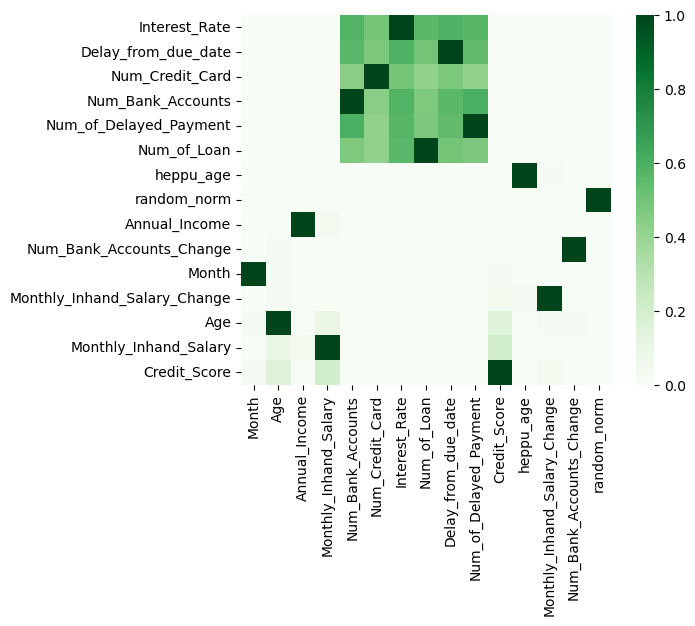

In [355]:
corrs = df.drop(['Occupation'],axis=1).corr().round(3).sort_values('Credit_Score')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

In [356]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Score', 'heppu_age', 'Monthly_Inhand_Salary_Change', 'Num_Bank_Accounts_Change', 'random_norm']


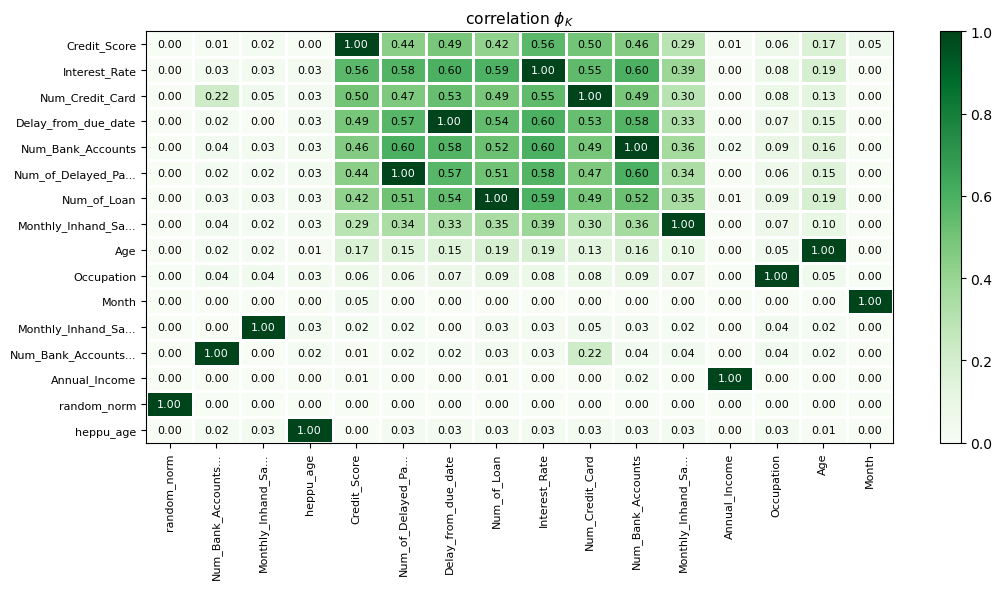

In [357]:
phik_overview = df.phik_matrix().round(2).sort_values('Credit_Score')

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

interval columns not set, guessing: ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Score', 'heppu_age', 'Monthly_Inhand_Salary_Change', 'Num_Bank_Accounts_Change', 'random_norm']


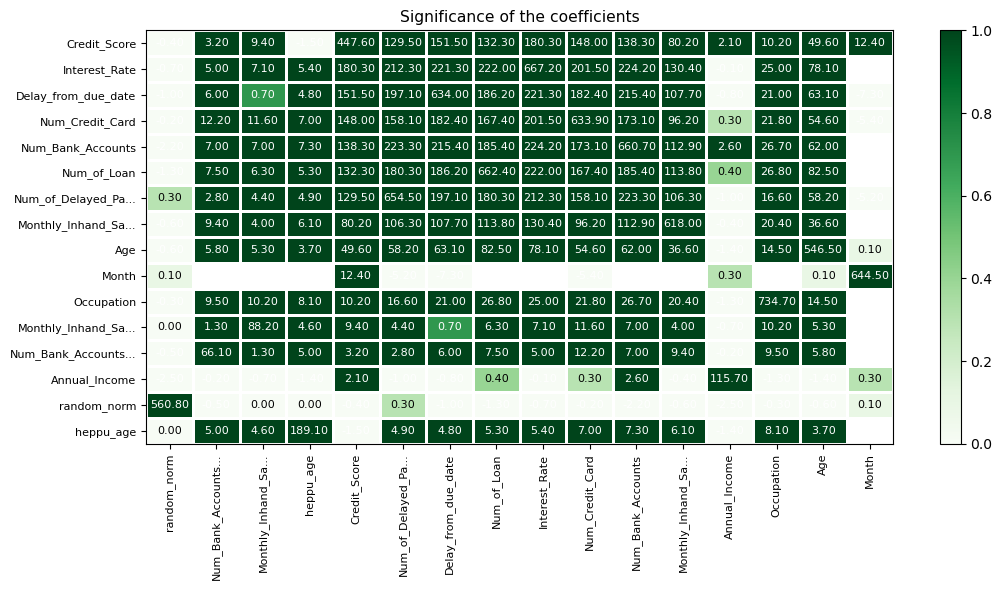

In [392]:
significance_overview = df.significance_matrix().fillna(0).round(1).sort_values('Credit_Score')

plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

interval columns not set, guessing: ['Month', 'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Score']


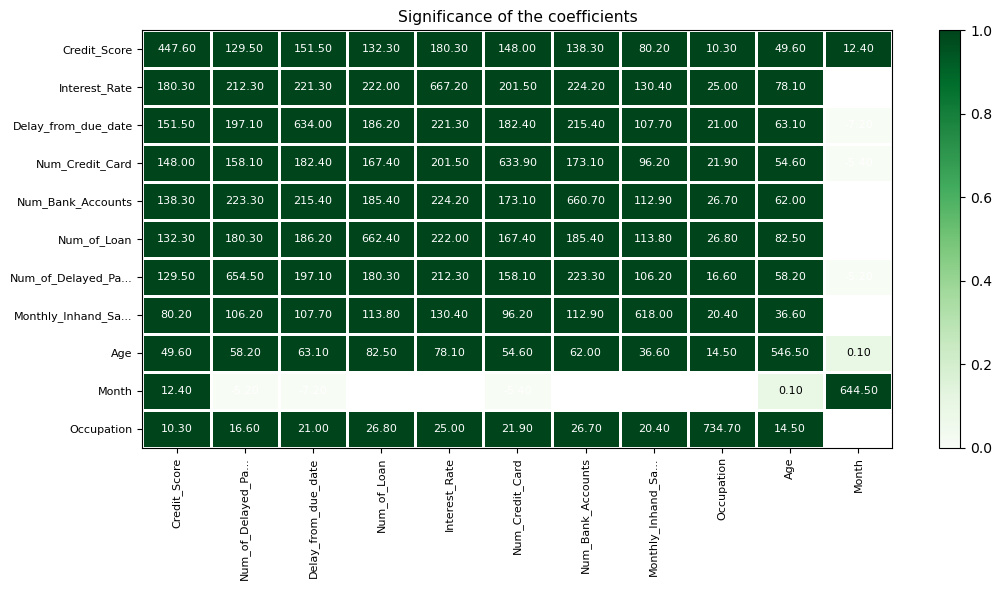

In [394]:
significance_overview = df.drop(['random_norm','heppu_age','Monthly_Inhand_Salary_Change','Num_Bank_Accounts_Change','Annual_Income'], axis=1, errors = 'ignore').significance_matrix().fillna(0).round(1).sort_values('Credit_Score')

plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [359]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

In [396]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
X = df.drop(['Credit_Score','random_norm','heppu_age','Monthly_Inhand_Salary_Change','Num_Bank_Accounts_Change'], axis=1, errors = 'ignore')
y = df['Credit_Score'].fillna(0)

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
X

,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment
0,1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0
1,2,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0
2,3,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0
3,4,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0
4,5,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0
99996,5,25.0,Mechanic,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0
99997,6,25.0,Mechanic,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0
99998,7,25.0,Mechanic,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0


In [399]:
cat_cols = ['Occupation']

In [400]:
model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1,eval_metric='AUC')
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=True, 
          early_stopping_rounds=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.117866
0:	test: 0.8112489	best: 0.8112489 (0)	total: 105ms	remaining: 1m 44s
100:	test: 0.8709150	best: 0.8709150 (100)	total: 8.64s	remaining: 1m 16s
200:	test: 0.8816653	best: 0.8816653 (200)	total: 17.6s	remaining: 1m 10s
300:	test: 0.8887261	best: 0.8887261 (300)	total: 26.1s	remaining: 1m
400:	test: 0.8941866	best: 0.8941866 (400)	total: 35.6s	remaining: 53.1s
500:	test: 0.8987456	best: 0.8987456 (500)	total: 44.4s	remaining: 44.2s
600:	test: 0.9026882	best: 0.9026882 (600)	total: 53s	remaining: 35.2s
700:	test: 0.9054908	best: 0.9054908 (700)	total: 1m 2s	remaining: 26.4s
800:	test: 0.9089278	best: 0.9089278 (800)	total: 1m 10s	remaining: 17.6s
900:	test: 0.9114499	best: 0.9114499 (900)	total: 1m 20s	remaining: 8.82s
999:	test: 0.9139178	best: 0.9139192 (998)	total: 1m 28s	remaining: 0us

bestTest = 0.9139192494
bestIteration = 998

Shrink model to first 999 iterations.


In [ ]:
0.9139192494

In [ ]:
0.9157145003

In [ ]:
0.9123441227

In [369]:
pred = model.predict(X_test)

In [370]:
from sklearn.metrics import confusion_matrix

In [375]:
pred = pred.reshape(20000)

In [376]:
confusion_matrix(y_test,pred)

array([[4208, 1523,  143],
       [1501, 8309,  789],
       [  60, 1410, 2057]], dtype=int64)

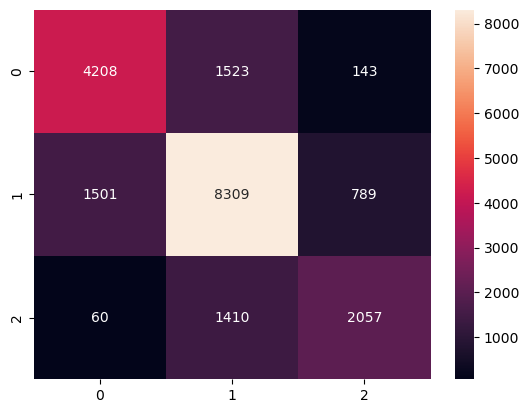

In [377]:
import seaborn as sns
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True , fmt=".0f");

In [378]:
fi = model.get_feature_importance(prettified=True)

In [379]:
fi

,Feature Id,Importances
0,Interest_Rate,19.694657
1,Delay_from_due_date,11.239131
2,Num_Credit_Card,9.218698
3,Age,9.051291
4,Num_of_Loan,8.783856
5,Monthly_Inhand_Salary,8.078528
6,Annual_Income,7.537790
7,Num_Bank_Accounts,7.485668
8,Month,7.272406
9,Num_of_Delayed_Payment,6.803865


In [380]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [382]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Score,heppu_age,Monthly_Inhand_Salary_Change,Num_Bank_Accounts_Change,random_norm
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,3,1,1,1,3.975795
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,3,1,1,1,4.195559
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,3,1,1,1,2.979941
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,3,1,1,1,4.590853
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,3,1,1,1,4.190784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,1,1,1,1,2.519772
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,1,1,1,1,5.056126
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,1,1,1,1,5.702934
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,2,1,1,1,3.819079


In [385]:
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 8
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 8, # number of trials to perform
    verbose=1
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_train.drop(["Occupation"],axis=1)), np.array(y_train))
### print results
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
red_area = X_train.columns[~(boruta.support_ | boruta.support_weak_)].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print('features in the red area:', red_area)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [77]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)').astype(np.float32)

In [78]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.extract(r'(\d+)').astype(np.float32)

In [83]:
mode_by_A = df.groupby('Customer_ID')['Age'].apply(lambda x: len(x.mode()))

In [85]:
mode_by_A


Customer_ID
CUS_0x1000    1
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     1
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     1
Name: Age, Length: 12500, dtype: int64

In [86]:
df[df['Customer_ID']=="CUS_0x100b"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1528,0x1ef6,CUS_0x100b,1,Shirboni,18.0,238-62-0395,Media_Manager,113781.38999999998,9549.7825,1,...,Good,1030.2,37.998760,15.0,0.0,0.0,397.24184577026637,Low_spent_Medium_value_payments,837.0,Poor
1529,0x1ef7,CUS_0x100b,2,Shirboni,18.0,238-62-0395,Media_Manager,113781.38999999998,9549.7825,1,...,_,1030.2,35.947655,NaN,0.0,0.0,661.6240479398714,Low_spent_Large_value_payments,563.0,Poor
1530,0x1ef8,CUS_0x100b,3,NaN,18.0,238-62-0395,Media_Manager,113781.38999999998,NaN,1,...,Good,1030.2,43.829630,15.0,0.0,0.0,NaN,High_spent_Large_value_payments,962.0,Poor
1531,0x1ef9,CUS_0x100b,4,Shirboni,18.0,238-62-0395,Media_Manager,113781.38999999998,9549.7825,1,...,Good,1030.2,31.016086,15.0,0.0,0.0,__10000__,High_spent_Large_value_payments,969.0,Standard
1532,0x1efa,CUS_0x100b,5,Shirboni,19.0,238-62-0395,Media_Manager,113781.38999999998,9549.7825,1,...,Good,1030.2,32.035662,15.0,0.0,0.0,758.0831954920012,Low_spent_Small_value_payments,486.0,Poor
1533,0x1efb,CUS_0x100b,6,Shirboni,19.0,238-62-0395,Media_Manager,113781.38999999998,9549.7825,1,...,Good,1030.2,40.136062,15.0,0.0,0.0,424.0032051421769,Low_spent_Medium_value_payments,810.0,Poor
1534,0x1efc,CUS_0x100b,7,Shirboni,19.0,238-62-0395,Media_Manager,113781.38999999998,9549.7825,1,...,Good,1030.2,29.174795,15.0,NaN,0.0,174.28759775147847,High_spent_Large_value_payments,1020.0,Standard
1535,0x1efd,CUS_0x100b,8,Shirboni,19.0,#F%$D@*&8,Media_Manager,113781.38999999998,9549.7825,1,...,Good,1030.2,28.592943,15.0,0.0,0.0,617.0792665202719,High_spent_Small_value_payments,597.0,Standard


---

In [19]:
import pandas as pd

# Предположим, у вас есть DataFrame df и вам нужно извлечь число из колонки 'age'
# Замените 'df' на имя вашего DataFrame и 'age' на имя вашей колонки

df = pd.DataFrame({'age': ['22 years and 3 Months', '30 years and 6 Months', '18 years and 9 Months']})

# Функция для извлечения числа из строки
def extract_age(row):
    return int(row.split(' ')[0])

# Применение функции к колонке 'age'
df['age'] = df['age'].apply(extract_age)

In [20]:
df

,age
0,22
1,30
2,18


---

In [24]:
import pandas as pd

# Предположим, у вас есть DataFrame df и вы хотите заменить значения в колонке 'Age'
# средним возрастом по 'Name', рассчитанным с помощью моды (наиболее часто встречающееся значение)
# Замените 'df' на имя вашего DataFrame

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Eva', 'Eva'],
    'Age': [25, 30, 20, 28, 22, 22],
    'G': [1, 30, 20, 28, 22, 99]
})

# Расчет наиболее часто встречающегося возраста по 'Name'
mode_age_by_name = df.groupby('Name')['Age'].transform(lambda x: x.mode().iloc[0])

# Замена значений в колонке 'Age' средним возрастом по 'Name' (модой)
df['Age'] = df['Age'].fillna(mode_age_by_name)

print(df)

    Name  Age   G
0  Alice   25   1
1    Bob   30  30
2  Alice   20  20
3    Bob   28  28
4    Eva   22  22
5    Eva   22  99


---

In [26]:
import pandas as pd
import numpy as np

# Предположим, у вас есть DataFrame df
# Замените 'df' на имя вашего DataFrame

# Вычисление среднего и стандартного отклонения для колонки 'G'
mean_G = df['G'].mean()
std_G = df['G'].std()

# Определение верхней и нижней границ диапазона +/-2.5 std от среднего значения
upper_bound = mean_G + 2.5 * std_G
lower_bound = mean_G - 2.5 * std_G

# Удаление значений из колонки 'G', которые не попадают в указанный диапазон
df = df[(df['G'] >= lower_bound) & (df['G'] <= upper_bound)]

print(df)

    Name  Age   G
0  Alice   25   1
1    Bob   30  30
2  Alice   20  20
3    Bob   28  28
4    Eva   22  22
5    Eva   22  99


In [27]:
upper_bound

117.76772600993559

In [28]:
lower_bound

-51.10105934326892

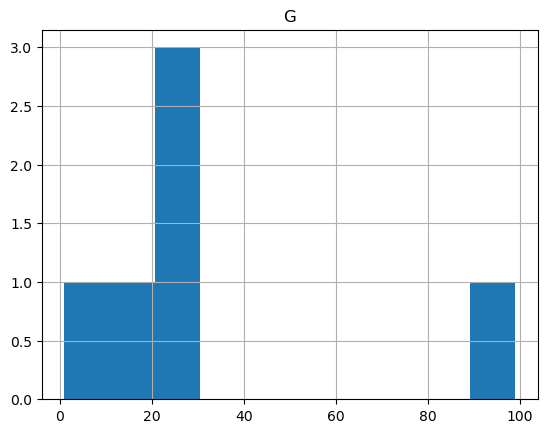

In [30]:
df.hist(column='G');

---

In [93]:
import pandas as pd

df = pd.DataFrame({
    'A': ["Вера", "Света", "Вера", "Света", "Вера", "Света","Ира","Петя"],
    'B': [1, 5, 2, 5, None, None,1, None],
    'S': [0, 0, 0, 0, 0, 0, 0,1],
})
# Рассчитываем моду группировки по столбцу 'А'
mode_by_A = df.groupby('A')['B'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# Заменяем пропуски в столбце 'Б' модой группировки по столбцу 'А'
df['B'] = df.apply(lambda row: mode_by_A[row['A']] if pd.isnull(row['B']) else row['B'], axis=1)

print(df)

       A    B  S
0   Вера  1.0  0
1  Света  5.0  0
2   Вера  2.0  0
3  Света  5.0  0
4   Вера  1.0  0
5  Света  5.0  0
6    Ира  1.0  0
7   Петя  NaN  1


In [98]:
def test_f(x):
    print(x)
    return x.mean()

In [102]:
def test_f(x):
  
    return x[0:2]

In [103]:
df["A"].apply(test_f)

0    Ве
1    Св
2    Ве
3    Св
4    Ве
5    Св
6    Ир
7    Пе
Name: A, dtype: object

In [108]:
# Рассчитываем моду группировки по столбцу 'А'
df["C"] = df.groupby('A')['B'].transform(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

In [109]:
df

,A,B,S,C
0,Вера,1.0,0,1.0
1,Света,5.0,0,5.0
2,Вера,2.0,0,1.0
3,Света,5.0,0,5.0
4,Вера,1.0,0,1.0
5,Света,5.0,0,5.0
6,Ира,1.0,0,1.0
7,Петя,NaN,1,NaN


---